### Lending Club P2P loans 2018 Q1

The rise of peer-to-peer (P2P) lending in recent years has contributed greatly to democratizing access to financing for previously underserved population groups. What are the characteristics of such borrowers and what can we learn about their credit habits?

Thankfully, Lending Club releases quarterly data on loans issued during a particular period. I will be using the most recent loan data on 2018 Q1 to look at the most recent batch of borrowers. Understandably, due to the recency of the data, repayment information is still incomplete. It would be interesting down the road to look at an older data set with more repayment information or at the declined loans data that Lending Club provides.

In [213]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import missingno as msno
from itertools import islice
import csv

In [214]:
all_data = []
with open('LoanStats_2018Q1.csv') as data:
    for row in islice(csv.reader(data), 1, None):
        all_data.append(np.array(row))
        
df = pd.DataFrame(all_data)
df.columns = df.iloc[0]
df = df.drop([0])
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
1,,,3000,3000,3000,36 months,10.41%,97.39,B,B3,...,,,Cash,N,,,,,,
2,,,14100,14100,14100,36 months,23.87%,552.23,E,E2,...,,,Cash,N,,,,,,
3,,,10000,10000,10000,36 months,6.07%,304.54,A,A2,...,,,Cash,N,,,,,,
4,,,40000,40000,40000,60 months,9.43%,838.71,B,B1,...,,,Cash,N,,,,,,
5,,,6300,6300,6300,36 months,9.43%,201.61,B,B1,...,,,Cash,N,,,,,,


In [215]:
df.shape

(107868, 145)

A look at the shape reveals 107,868 loans originated in Q1 of 2018. There are 145 columns with some columns that are completely empty.

Some empty columns such as id and member_id are understandeable they are personally identifiable information. Many of the variables also relate to detailed loan information. For the purposes of this analysis, we focus on a few demographic variables and basic loan information:

1. loan_amnt
2. funded_amnt
3. term
4. int_rate
5. grade
6. emp_length
7. home_ownership
8. annual_inc
9. title
10. addr_state
11. dti
12. open_acc
13. total_acc
14. pub_rec

In [216]:
cols = ['loan_amnt','funded_amnt','term','int_rate','grade','emp_length','home_ownership','annual_inc','title','addr_state','dti','open_acc','total_acc','pub_rec']
new_df = df[cols]
new_df.head()

,loan_amnt,funded_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,title,addr_state,dti,open_acc,total_acc,pub_rec
1,3000,3000,36 months,10.41%,B,10+ years,MORTGAGE,60000,Debt consolidation,MO,27.94,20,36,0
2,14100,14100,36 months,23.87%,E,< 1 year,OWN,128000,Debt consolidation,NC,14.12,12,32,0
3,10000,10000,36 months,6.07%,A,5 years,OWN,50000,Credit card refinancing,WI,8.93,9,16,1
4,40000,40000,60 months,9.43%,B,10+ years,MORTGAGE,150000,Debt consolidation,NY,4.09,6,9,1
5,6300,6300,36 months,9.43%,B,6 years,RENT,60000,Credit card refinancing,WV,13.36,7,32,1


In [217]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 107868 entries, 1 to 107868
Data columns (total 14 columns):
loan_amnt         107864 non-null object
funded_amnt       107864 non-null object
term              107864 non-null object
int_rate          107864 non-null object
grade             107864 non-null object
emp_length        107864 non-null object
home_ownership    107864 non-null object
annual_inc        107864 non-null object
title             107864 non-null object
addr_state        107864 non-null object
dti               107864 non-null object
open_acc          107864 non-null object
total_acc         107864 non-null object
pub_rec           107864 non-null object
dtypes: object(14)
memory usage: 12.3+ MB


Looking at the data types for the variables, they are currently all non-null objects. For variables that should indicate a sense of scale or order, the data should be changed accordingly.

In [218]:
new_df = new_df.replace(['',None,'n/a'], np.nan, regex = True)

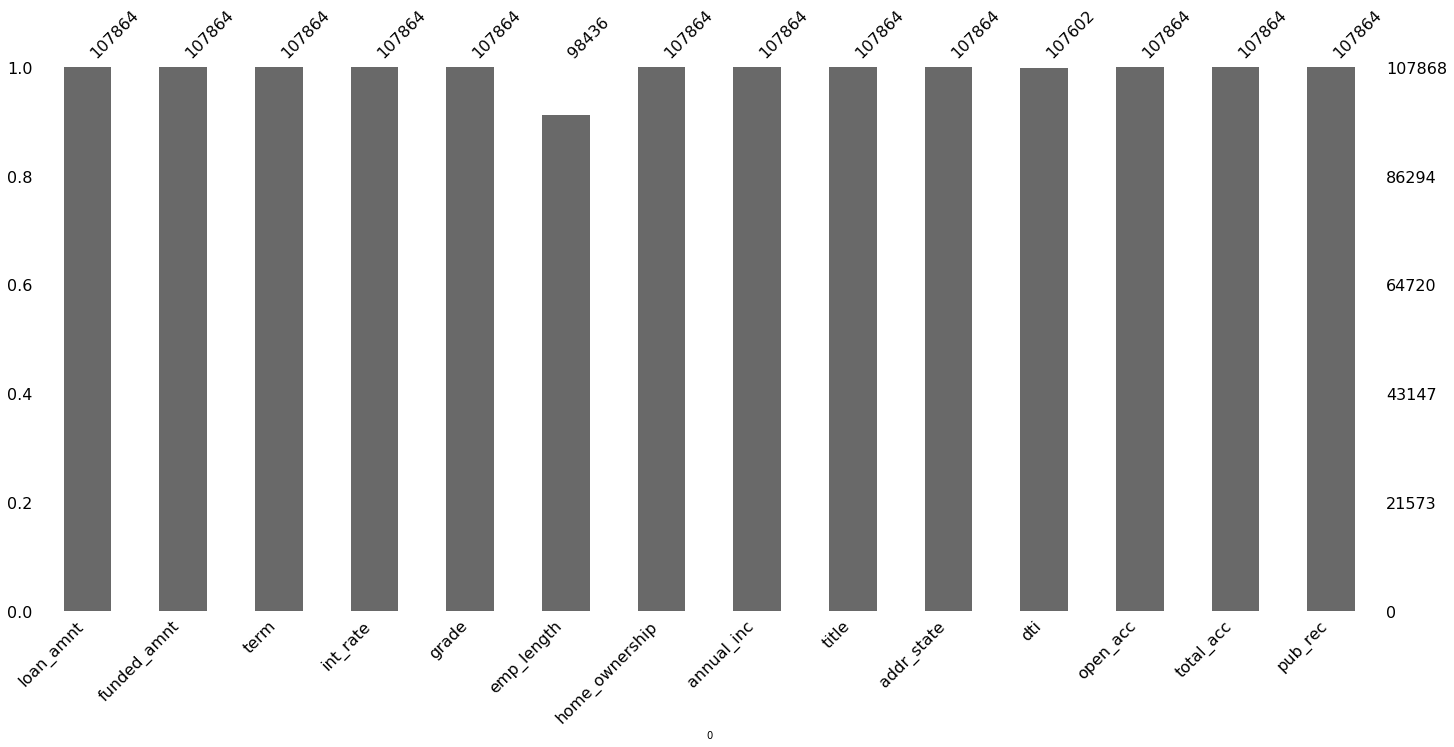

In [219]:
%matplotlib inline
msno.bar(new_df)

In [220]:
new_df = new_df.dropna()

A look at individual entries reveal that empty data is represented by an empty string object, a Nonetype object, or a string 'n/a'. By replacing those with NaN and running missingno, we see a large number of missing fields under 'emp_length'. 

Dropping the records with missing data yield 98,424 rows, not a large dilution of the initial number.

Based on the nature of the individual variables, they have to be converted to the following data types to be useful in any subsequent analysis:

Integer data type:
- loan_amnt
- funded_amnt
- term
- open_acc
- total_acc
- pub_rec

Float data type:
- int_rate
- dti

Ordered category data type:
- grade
- emp_length
- annual_inc

### Integer data types

For most of the integer type conversions, a simple conversion is possible with 'astype'. However, the 'term' variable is currently represented by '36 Months' and '60 Months'. Additional transformation will have to be applied on it.

In [221]:
new_df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [222]:
new_df['term'] = new_df['term'].map({' 36 months':np.int(36),' 60 months':np.int(60)})

In [223]:
int_cols = ['loan_amnt','funded_amnt','open_acc','total_acc','pub_rec']
for col in int_cols:
    new_df[col] = new_df[col].astype(int)

### Float data types

The interest rate column has to be sanitized before conversion to float due to the spaces and percentage symbol.

In [224]:
new_df['int_rate'] = new_df['int_rate'].replace([' ','%'],'',regex = True)

In [225]:
float_cols = ['int_rate','dti']
for col in float_cols:
    new_df[col] = new_df[col].astype(float)

### Ordered categorical data types

Categorical data types are slightly trickier and we will go through them one by one.

For the 'grade' variable, the order matters and a grade of A conveys the highest loan quality. The categorical variable is thus ordered as such.

In [226]:
new_df['grade'].unique()

array(['B', 'E', 'A', 'C', 'D', 'G', 'F'], dtype=object)

In [227]:
ordered_grade = ['G','F','E','D','C','B','A']
new_df['grade'] = new_df['grade'].astype('category', ordered = True, categories=ordered_grade).cat.codes

By the same process, we can convert employment length to an ordinal variable as well since the entire '>1 year' and '10+ years' don't convey the necessary information.

In [228]:
new_df['emp_length'].unique()

array(['10+ years', '< 1 year', '5 years', '6 years', '3 years', '2 years',
       '7 years', '4 years', '1 year', '9 years', '8 years'], dtype=object)

In [229]:
ordered_emp = ['< 1 year','1 year','2 years','3 years','4 years',
               '5 years', '6 years', '7 years','8 years','9 years',
                '10+ years']
new_df['emp_length'] = new_df['emp_length'].astype('category', ordered = True, categories=ordered_emp).cat.codes

In [230]:
new_df['home_ownership'].unique()

array(['MORTGAGE', 'OWN', 'RENT', 'ANY'], dtype=object)

In [231]:
new_df['annual_inc'] = new_df['annual_inc'].astype(float)
new_df['annual_inc'].describe()

count    9.842400e+04
mean     8.163789e+04
std      7.906254e+04
min      3.300000e+01
25%      4.800000e+04
50%      6.800000e+04
75%      9.800000e+04
max      8.365188e+06
Name: annual_inc, dtype: float64

In [232]:
new_df['annual_inc'].max()

8365188.0

As there are too many unique values in annual income, it is more useful to separate them into categories based on the value band that they fall in. I have used pd.qcut in this case to allocate a bin for each range of values.

'qcut' will divide the items such that there are an equal number of items in each bin. Note that there is another method called pd.cut. 'cut' allocates items to bins by the values, regardless of the number of items in each bin. 

While my initial inclination was to use cut to get a better perspective of the income ranges, it turns out that there were multiple outliers that skewed the data greatly. As seen from the number of items in each bin, using 'cut' provided a balanced view of the income data.

In [233]:
income_bins = [1,2,3,4,5]
print(pd.cut(new_df['annual_inc'],5).value_counts())

(-8332.155, 1673064.0]    98409
(1673064.0, 3346095.0]        9
(6692157.0, 8365188.0]        3
(3346095.0, 5019126.0]        2
(5019126.0, 6692157.0]        1
Name: annual_inc, dtype: int64


In [234]:
print(pd.qcut(new_df['annual_inc'],5).value_counts())

(44000.0, 60000.0]       22121
(32.999, 44000.0]        19739
(107000.0, 8365188.0]    19535
(78000.0, 107000.0]      19400
(60000.0, 78000.0]       17629
Name: annual_inc, dtype: int64


In [235]:
new_df['income_bins'] = pd.qcut(new_df['annual_inc'],5,income_bins).cat.codes
new_df['income_bins'].head()

1    1
2    4
3    1
4    4
5    1
Name: income_bins, dtype: int8

In [236]:
new_df['title'].unique()

array(['Debt consolidation', 'Credit card refinancing', 'Major purchase',
       'Home improvement', 'Home buying', 'Other', 'Car financing',
       'Business', 'Medical expenses', 'Moving and relocation', 'Vacation',
       'Green loan'], dtype=object)

In [237]:
new_df['addr_state'].unique()

array(['MO', 'NC', 'WI', 'NY', 'WV', 'LA', 'TX', 'NJ', 'FL', 'TN', 'GA',
       'WA', 'AR', 'IL', 'CA', 'WY', 'MN', 'CO', 'DC', 'PA', 'ME', 'IN',
       'MI', 'OR', 'OK', 'UT', 'AL', 'NV', 'AZ', 'CT', 'OH', 'VA', 'HI',
       'NM', 'MD', 'MA', 'KY', 'NH', 'ND', 'MS', 'DE', 'SC', 'KS', 'NE',
       'AK', 'RI', 'VT', 'MT', 'ID', 'SD'], dtype=object)

In [242]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98424 entries, 1 to 107864
Data columns (total 15 columns):
loan_amnt         98424 non-null int64
funded_amnt       98424 non-null int64
term              98424 non-null int64
int_rate          98424 non-null float64
grade             98424 non-null int8
emp_length        98424 non-null int8
home_ownership    98424 non-null object
annual_inc        98424 non-null float64
title             98424 non-null object
addr_state        98424 non-null object
dti               98424 non-null float64
open_acc          98424 non-null int64
total_acc         98424 non-null int64
pub_rec           98424 non-null int64
income_bins       98424 non-null int8
dtypes: float64(3), int64(6), int8(3), object(3)
memory usage: 10.0+ MB


### External data

In [264]:
state_codes = new_df['addr_state'].unique()

In [267]:
state_codes

array(['MO', 'NC', 'WI', 'NY', 'WV', 'LA', 'TX', 'NJ', 'FL', 'TN', 'GA',
       'WA', 'AR', 'IL', 'CA', 'WY', 'MN', 'CO', 'DC', 'PA', 'ME', 'IN',
       'MI', 'OR', 'OK', 'UT', 'AL', 'NV', 'AZ', 'CT', 'OH', 'VA', 'HI',
       'NM', 'MD', 'MA', 'KY', 'NH', 'ND', 'MS', 'DE', 'SC', 'KS', 'NE',
       'AK', 'RI', 'VT', 'MT', 'ID', 'SD'], dtype=object)

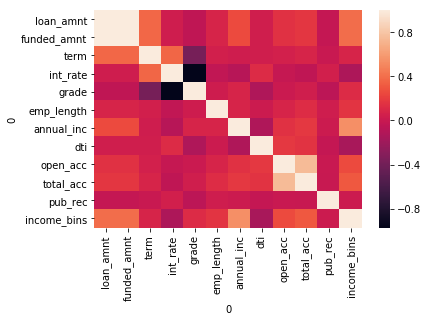

In [239]:
sb.heatmap(new_df.corr())